<h1><strong><u>Naive Bayes Model Test</u></strong></h1>

In [8]:
%%capture
%run DataPrep.ipynb

<h2><strong><u>Naive Bayes Model Selection</u></strong></h2>

<h4><strong><u>Findings From 'Model Selection' Section</u></strong></h4>
Gaussian takes no parameters. No 'Validation Curve' or 'Cross-Validation Test' section needed.

In [9]:
pipeline = Pipeline(
    [
        ("scale", StandardScaler()),
        ("clf", GaussianNB())
    ]
)
nb_classifier = pipeline.fit(X_train, y_train)

def nb_bc_classifier():
    return nb_classifier

<h2><strong><u>Model Evaluation</u></strong></h2>

<h3><strong><u>Learning Curve Tests</u></strong></h3>

In [10]:
for key, value in clf_metrics.items():
    bayesian_train_sizes, bayesian_train_scores, bayesian_validation_scores = learning_curve(
        nb_classifier,
        X_train,
        y_train,
        cv=5,  # Number of folds for cross-validation
        scoring=value,  # Metric to evaluate the model
        n_jobs=-1,  # Use all available CPU cores
    )

    # Calculate mean and standard deviation for scores
    bayesian_train_scores_mean = np.mean(bayesian_train_scores, axis=1)
    bayesian_train_scores_std = np.std(bayesian_train_scores, axis=1)
    bayesian_validation_scores_mean = np.mean(bayesian_validation_scores, axis=1)
    bayesian_validation_scores_std = np.std(bayesian_validation_scores, axis=1)

    # Calculate spread of data around the mean
    bayesian_train_range_minus = bayesian_train_scores_mean - bayesian_train_scores_std
    bayesian_train_range_plus = bayesian_train_scores_mean + bayesian_train_scores_std
    bayesian_validation_range_minus = bayesian_validation_scores_mean - bayesian_validation_scores_std
    bayesian_validation_range_plus = bayesian_validation_scores_mean + bayesian_validation_scores_std

    lc_dict[key] = [[bayesian_train_scores_mean, bayesian_validation_scores_mean],
                    [bayesian_train_range_minus, bayesian_train_range_plus], 
                    [bayesian_validation_range_minus, bayesian_validation_range_plus], 
                    bayesian_train_sizes]

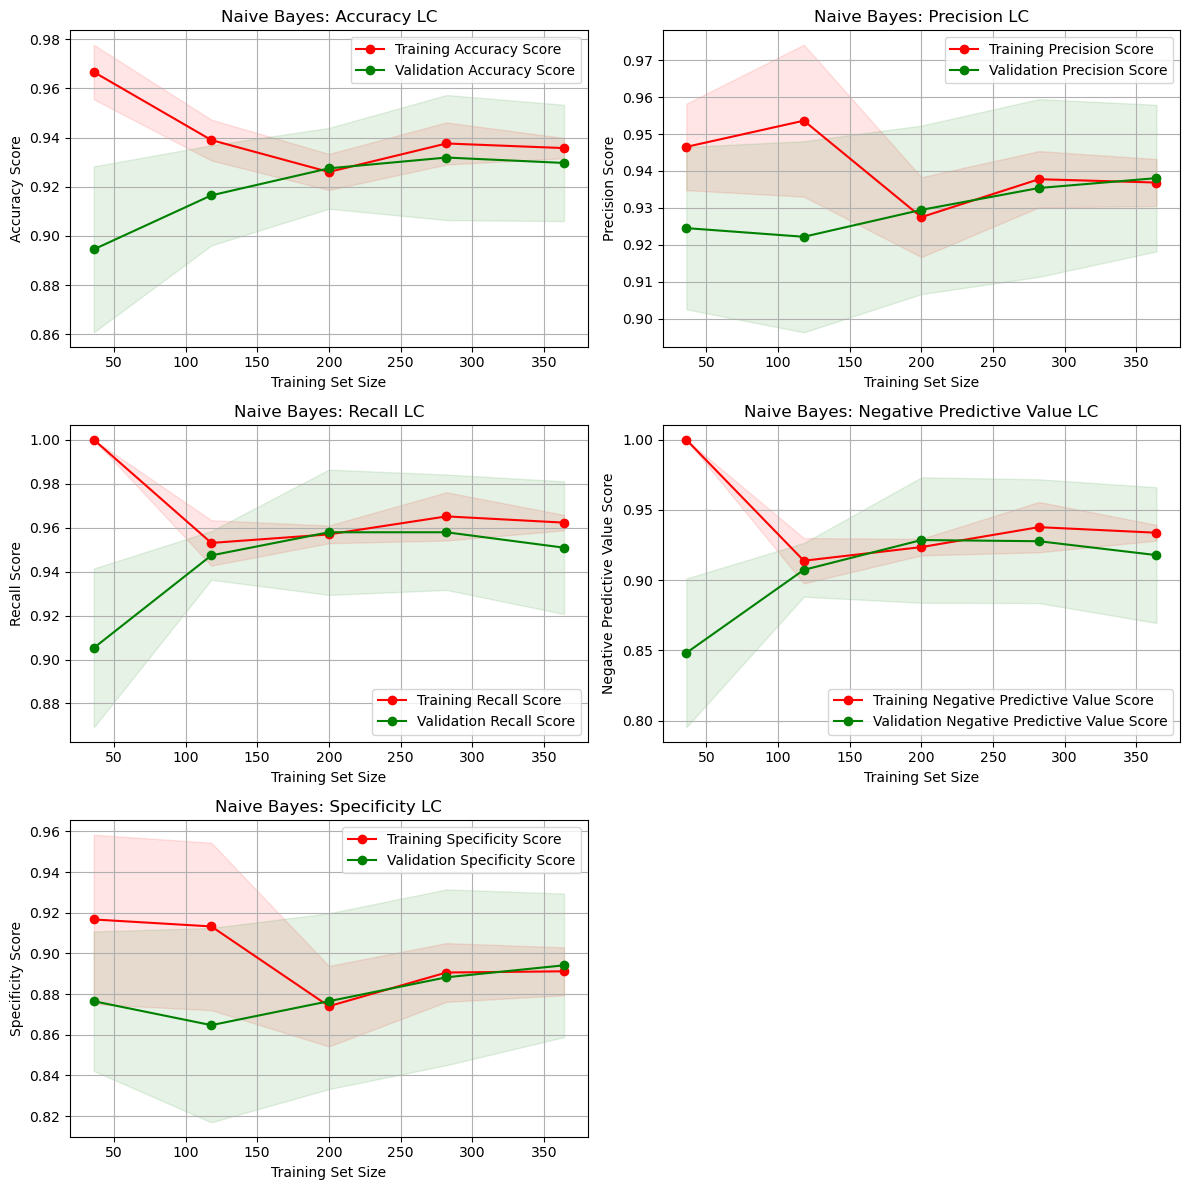

In [11]:
# Plot the learning curves
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Flatten the axes array for easier iteration
axs = axs.flatten()
count = 0
for key, value in lc_dict.items():
    axs[count].set_title(f"Naive Bayes: {key} LC")
    axs[count].set_xlabel("Training Set Size")
    axs[count].set_ylabel(f"{key} Score")
    axs[count].grid()

    axs[count].fill_between(value[3], value[1][0], value[1][1], alpha=0.1, color="r")
    axs[count].fill_between(value[3], value[2][0], value[2][1], alpha=0.1, color="g")
    axs[count].plot(value[3], value[0][0], 'o-', color="r", label=f"Training {key} Score")
    axs[count].plot(value[3], value[0][1], 'o-', color="g", label=f"Validation {key} Score")
    axs[count].legend(loc="best")
    count += 1
    
fig.delaxes(axs[count]) 

plt.tight_layout()
plt.show()

<h3><strong><u>Evaluation Metrics</u></strong></h3>

In [12]:
for key, value in clf_metrics.items():
    print(f"{key}")
    nb_training_values = cross_val_score(nb_classifier, X_train, y=y_train, scoring=value, cv=5)
    print("CV Training Scores: ", nb_training_values)
    np_nb_training_values = np.array(nb_training_values)
    average = np.mean(np_nb_training_values)
    stDev = np.std(np_nb_training_values)
    print(f"Training Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy
CV Training Scores:  [0.92307692 0.9010989  0.94505495 0.91208791 0.96703297]
Training Average and Standard Error:  0.93% ± 2.37% 

Precision
CV Training Scores:  [0.96296296 0.9137931  0.94827586 0.91525424 0.95      ]
Training Average and Standard Error:  0.94% ± 1.99% 

Recall
CV Training Scores:  [0.9122807  0.92982456 0.96491228 0.94736842 1.        ]
Training Average and Standard Error:  0.95% ± 3.02% 

Negative Predictive Value
CV Training Scores:  [0.86486486 0.87878788 0.93939394 0.90625    1.        ]
Training Average and Standard Error:  0.92% ± 4.83% 

Specificity
CV Training Scores:  [0.94117647 0.85294118 0.91176471 0.85294118 0.91176471]
Training Average and Standard Error:  0.89% ± 3.53% 



Text(0.5, 1.0, 'Naive Bayes: Confusion Matrix (Evaluation)')

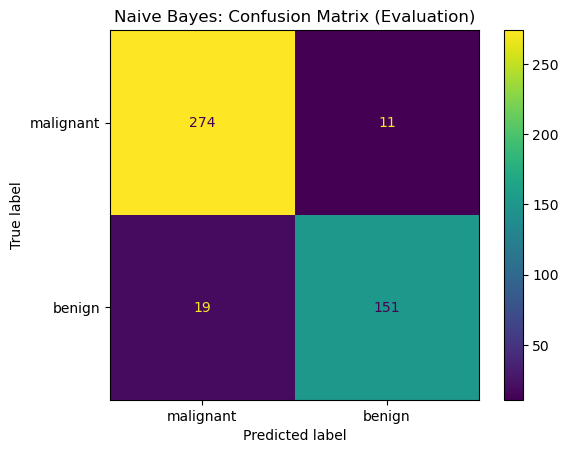

In [13]:
#Training Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(nb_classifier, X_train, y_train, labels=['malignant', 'benign'])
disp.ax_.set_title("Naive Bayes: Confusion Matrix (Evaluation)")

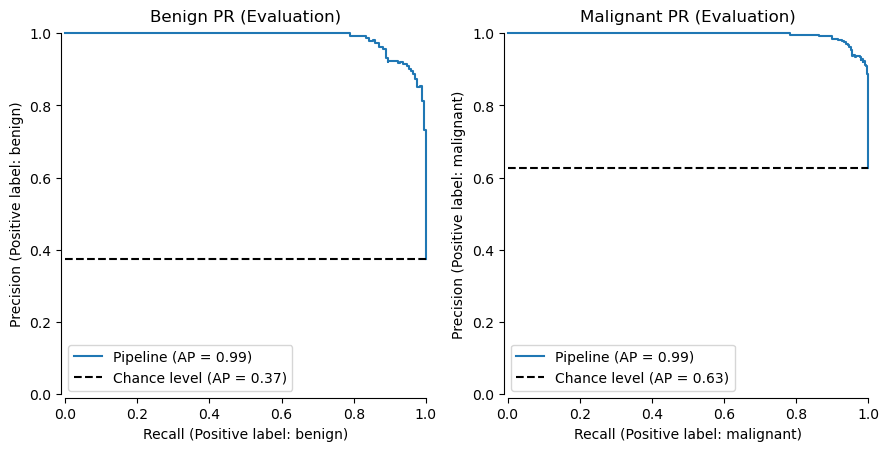

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(9, 9))
axs = axs.flatten()
count = 0
for label in train_labels:
    disp = PrecisionRecallDisplay.from_estimator(nb_classifier, X_train, y_train, ax=axs[count], pos_label=label, plot_chance_level=True, despine=True)
    disp.ax_.set_title(f"{label.title()} PR (Evaluation)")
    count += 1

plt.tight_layout()
plt.show()

<h4><strong><u>Findings From 'Model Evaluation' Phase</u></strong></h4>
The GaussianNB model did slightly better than the K-Nearest Neighbor classifier but I still see its results as just decent considering the magnitude of the problem domain. It will still be tested in the 'Final Model Selection' phase.